**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(pheatmap)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_chipseq/fcc_astarr_macs_input_overlap/summary"
txt_fname = "region.coverage.encode_chipseq_histone.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_coverage_chipseq_histone = dat
print(dim(dat))
head(dat)

[1] 2850798      12


Region,Size,Covered,Sum,Mean0,Mean,Min,Max,Annotation_A,Annotation_B,Target,Index_File
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1:10038-10405,367,367,157.198,0.428333,0.428333,0,1.08399,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:14282-14614,332,332,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:16025-16338,313,313,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:17288-17689,401,401,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:28934-29499,565,565,0.000,0.000000,0.000000,0,0.00000,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP
chr1:115429-115969,540,540,392.975,0.727731,0.727731,0,2.71006,fcc_astarr_macs_input_overlap,encode_chipseq_H2AFZ_ENCFF621DJP,H2AFZ,ENCFF621DJP


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "region.summary.fcc_peak_call.label.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc_label = dat
print(dim(dat))
head(dat)

[1] 155926     19


Chrom,ChromStart,ChromEnd,Region,Type,Num_Assay,TSS_Total,TSS_Essential,Label1,Label2,Label3,Screen_CRISPR_Total,Screen_CRISPR_Growth,Screen_CRISPR_HCRFF,Screen_CRISPR_E2G,Signif_CRISPR_Total,Signif_CRISPR_Growth,Signif_CRISPR_HCRFF,Signif_CRISPR_E2G
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,10038,10405,chr1:10038-10405,Repress_GCFilter,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,Repress_GCFilter,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,17288,17689,chr1:17288-17689,Repress,1,0,0,Silencer,Silencer,Silencer,0,0,0,0,0,0,0,0
chr1,28934,29499,chr1:28934-29499,Repress,1,1,0,Silencer,Promoter,TSS:Silencer,0,0,0,0,0,0,0,0


In [4]:
dat = dat_coverage_chipseq_histone
dat = dat %>% 
    dplyr::group_by(Region, Target) %>% 
    dplyr::summarise(Score = mean(Mean0), .groups = 'drop')

dat_region_score = dat
print(dim(dat))
head(dat)

[1] 1800504       3


Region,Target,Score
<chr>,<chr>,<dbl>
chr10:100009244-100010395,H2AFZ,9.2276100
chr10:100009244-100010395,H3K27ac,2.2696800
chr10:100009244-100010395,H3K27me3,0.4426130
chr10:100009244-100010395,H3K36me3,0.3754215
chr10:100009244-100010395,H3K4me1,3.2244620
chr10:100009244-100010395,H3K4me2,19.9214000


In [5]:
dat = dat_region_score
dat = dat %>% tidyr::spread(Target, Score) 
dat = dat %>% column_to_rownames(var = "Region")

mat_region_score = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 150042     12


,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
chr1:100028014-100029653,0.9084870,1.30093,0.2900415,1.262835,1.849360,0.604243,0.5071692,0.249377,1.040661,0.773100,0.710016,0.701975
chr1:100036895-100039189,6.4620600,14.03340,0.3279065,1.293915,1.099260,29.863100,44.9492000,17.092200,24.336950,0.922788,1.073280,1.047220
chr1:100046252-100046533,0.0301893,1.13101,0.3555290,0.452645,3.434910,1.365020,1.1878148,10.955000,1.145038,2.110780,0.393331,2.246230
chr1:100048290-100048918,0.4234280,1.79969,0.5050575,1.268055,2.965920,1.660700,0.9599802,10.445900,1.344954,2.519360,0.659722,4.496470
chr1:100050225-100050529,0.8108740,2.30582,0.1711036,2.812605,2.793945,2.726880,1.0107967,7.257700,1.529890,1.462830,0.749994,2.196770
chr1:100064757-100065161,0.3412110,1.36302,0.3218830,1.954740,2.016580,0.471048,0.6323928,1.348410,1.677045,1.043280,0.727391,0.971441


In [6]:
dat = dat_region_annot_fcc_label
vec = unique(dat$Region)
vec_txt_region_fcc = vec

In [7]:
dat = dat_coverage_chipseq_histone
vec = unique(dat$Region)
vec_txt_region_tot = vec

In [8]:
dat = dat_region_annot_fcc_label
dat = dat %>% 
    dplyr::filter(Type != "Repress_GCFilter") %>%
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::mutate(Label = Label2) %>%
    dplyr::select(Region, Label)

#tmp = data.frame(Region = setdiff(vec_txt_region_tot, vec_txt_region_fcc), Label = "Inactive")
#dat = bind_rows(dat, tmp)
dat = dat %>% dplyr::distinct()

dat_region_label = dat
print(dim(dat))
head(dat)

[1] 18345     2


Region,Label
<chr>,<chr>
chr1:778233-779389,Enhancer
chr1:958722-959968,Promoter
chr1:960468-961615,Promoter
chr1:1005094-1005553,Enhancer
chr1:1013154-1014482,Promoter
chr1:1059012-1060137,Enhancer


In [9]:
dat = dat_region_label
table(dat$Label)


Enhancer Promoter Silencer 
   11623     5082     1640 

In [10]:
mat = mat_region_score
print(dim(mat))

[1] 150042     12


In [12]:
fun = function(x){log2(x+1)}
mat = mat_region_score
mat = fun(mat)

set.seed(123)
idx = sample(1:nrow(mat), size=10000)
mat = mat[idx,]

head(mat, 3)

,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr7:74400751-74401710,0.9329138,0.4621947,0.9703254,0.7319696,0.7703254,0.7024058,0.6275749,0.4319064,0.9753092,1.0088884,0.5965230,1.8767861
chr6:98827652-98828256,1.7686332,0.5080361,1.7001045,0.4868597,1.9729490,1.0827911,1.0173720,0.4133319,1.1776021,0.7101278,0.4663003,0.3096314
chr4:3773278-3773995,1.4316711,0.6012296,2.2398685,0.4980910,2.2293926,1.2391842,0.6377303,0.3319207,1.4211605,1.2432486,0.8404866,1.9845857


In [13]:
tmp = dist(mat)
obj = hclust(tmp)
obj_tree_row = obj

In [14]:
tmp = t(mat)
tmp = dist(tmp)
obj = hclust(tmp)
obj_tree_col = obj

In [15]:
obj = obj_tree_col
names(obj)

[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

In [16]:
obj = obj_tree_col
idx = obj$order
vec = obj$labels
vec = vec[idx]
for (txt in vec){
    cat(txt, "\n")
}

H2AFZ 
H3K4me2 
H3K4me3 
H3K27ac 
H3K9ac 
H3K79me2 
H3K36me3 
H3K9me3 
H3K4me1 
H3K27me3 
H3K9me1 
H4K20me1 


In [17]:
obj = obj_tree_row
vec = cutree(obj, k = 15)
dat = data.frame(Region = names(vec), Cluster = vec)
dat = dat %>% dplyr::mutate(Cluster = paste("Cluster", Cluster))

vec_txt_region_sample = unique(dat$Region)
dat_region_cluster    = dat
print(dim(dat))
head(dat)

[1] 10000     2


,Region,Cluster
,<chr>,<chr>
chr7:74400751-74401710,chr7:74400751-74401710,Cluster 1
chr6:98827652-98828256,chr6:98827652-98828256,Cluster 1
chr4:3773278-3773995,chr4:3773278-3773995,Cluster 2
chr7:102945929-102946326,chr7:102945929-102946326,Cluster 1
chr15:41827542-41828592,chr15:41827542-41828592,Cluster 3
chr19:18401637-18402083,chr19:18401637-18402083,Cluster 4


In [18]:
dat = dat_region_label
dat = dat %>% dplyr::filter(Label != "Silencer")

dat = dat %>% 
    dplyr::full_join(dat_region_cluster, by = "Region") %>%
    dplyr::filter(Region %in% vec_txt_region_sample)

dat = dat %>% column_to_rownames(var = "Region")
#dat = dat %>% na.omit
dat_annot_row = dat
head(dat)

,Label,Cluster
,<chr>,<chr>
chr1:1714800-1716009,Enhancer,Cluster 11
chr1:2525679-2527117,Promoter,Cluster 13
chr1:3348728-3349936,Enhancer,Cluster 2
chr1:3795662-3797054,Promoter,Cluster 13
chr1:9687164-9688176,Promoter,Cluster 3
chr1:10032429-10033763,Promoter,Cluster 13


In [19]:
dat = dat_annot_row
vec = dat$Label
print(sum(is.na(vec)))
vec = dat$Cluster
print(sum(is.na(vec)))

[1] 8845
[1] 0


In [20]:
vec = brewer.pal(n = 7, name = "Reds")
vec = c("#FFFFFF", vec)
paletteLength = 50
myColor = colorRampPalette(vec)(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
#myBreaks <- c(seq(min(tmp), 0, length.out=ceiling(paletteLength/2) + 1), 
#              seq(max(tmp)/paletteLength, max(tmp), length.out=floor(paletteLength/2)))
myBreaks = seq(0, 7, length.out = paletteLength)

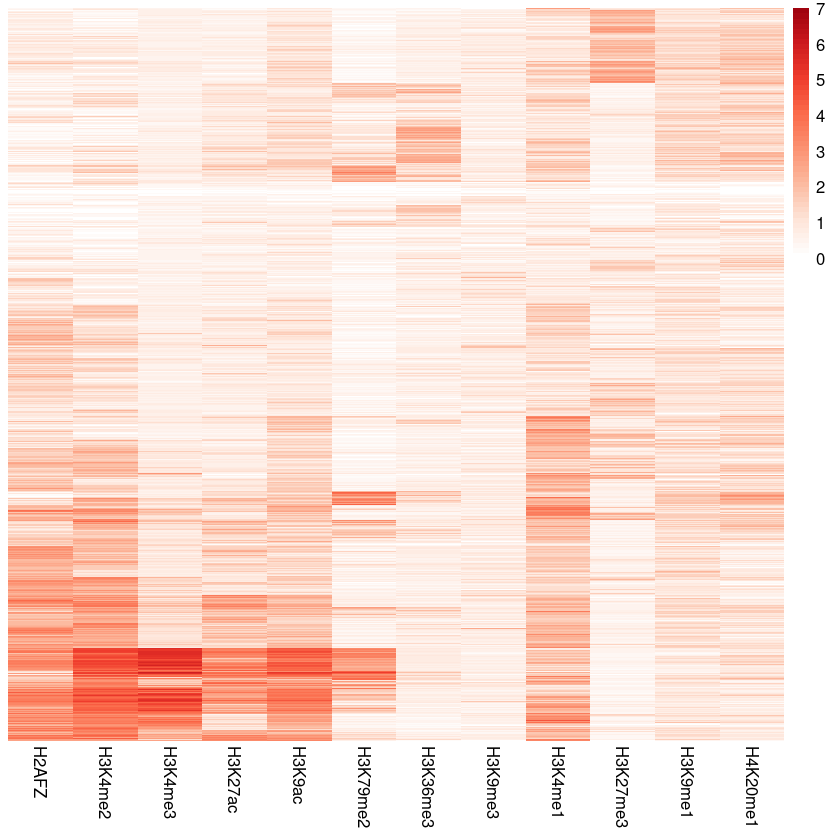

In [21]:
pheatmap(
    mat, #annotation_row = my_gene_col, #annotation_col = my_sample_col
    color  = myColor,
    breaks = myBreaks,
    cluster_rows = obj_tree_row,
    cluster_cols = obj_tree_col,
    treeheight_row = 0, 
    treeheight_col = 0,
    show_rownames = FALSE,
)

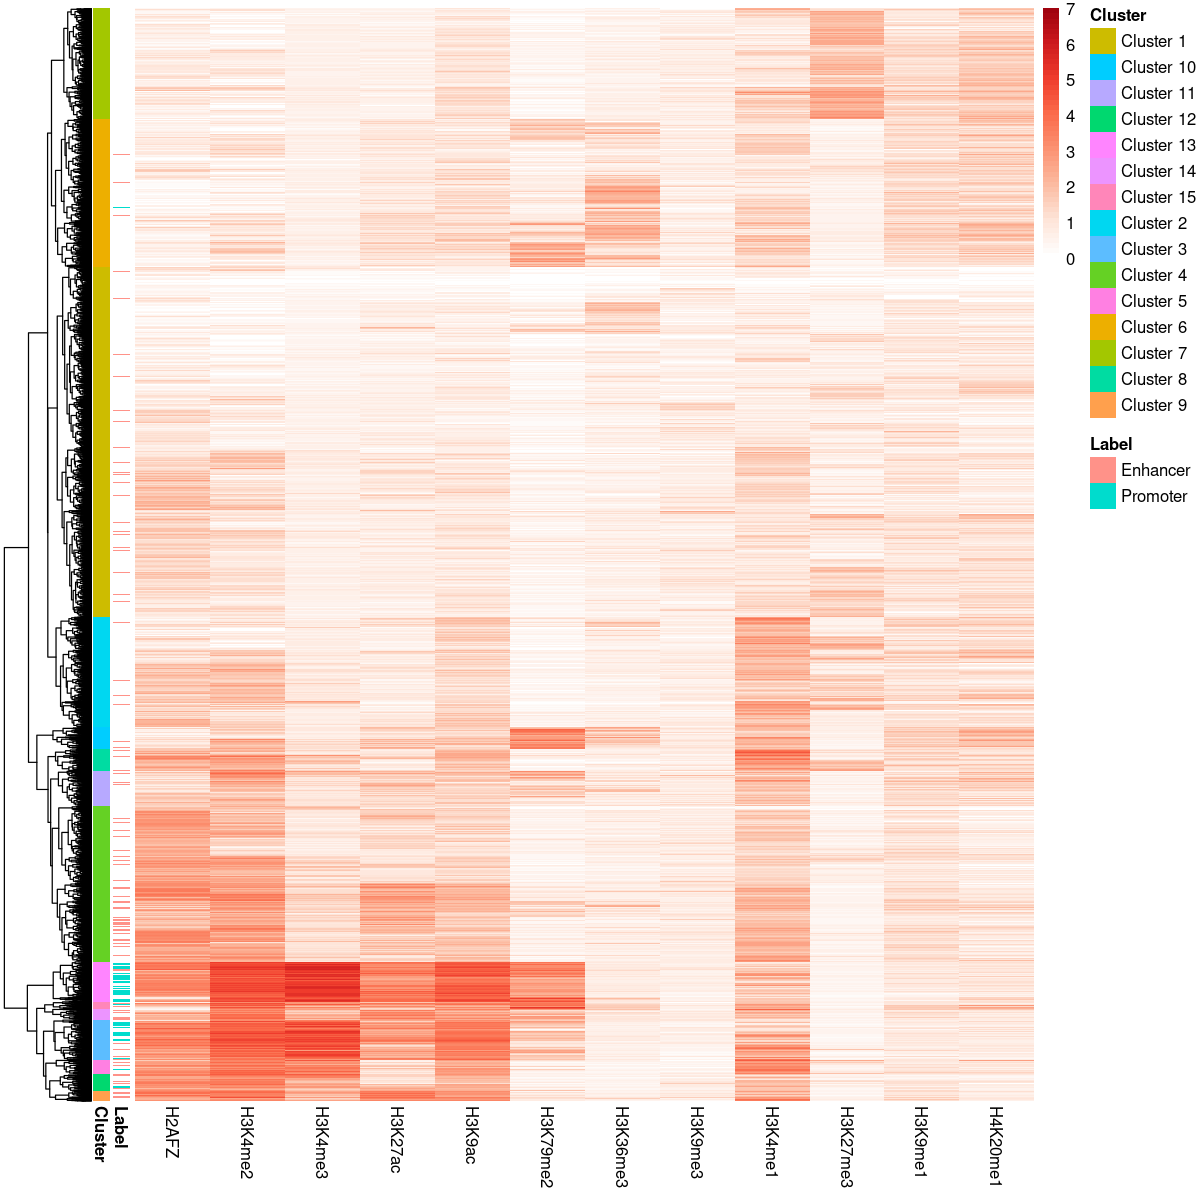

In [22]:
options(repr.plot.width = 10, repr.plot.height = 10)
pheatmap(
    mat, 
    annotation_row = dat_annot_row, #annotation_col = my_sample_col
    color  = myColor,
    breaks = myBreaks,
    cluster_rows = obj_tree_row,
    cluster_cols = obj_tree_col,
    treeheight_row = 50, 
    treeheight_col = 0,
    show_rownames = FALSE,
)

In [ ]:
dat = dat_region_merge
lst = split(dat, dat$Label)
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(-Label)
    dat = dat %>% column_to_rownames(var = "Region")
    return(dat)
})

In [ ]:
vec = brewer.pal(n = 7, name = "Reds")
vec = c("#FFFFFF", vec)
paletteLength = 50
myColor = colorRampPalette(vec)(paletteLength)
# length(breaks) == length(paletteLength) + 1
# use floor and ceiling to deal with even/odd length pallettelengths
#myBreaks <- c(seq(min(tmp), 0, length.out=ceiling(paletteLength/2) + 1), 
#              seq(max(tmp)/paletteLength, max(tmp), length.out=floor(paletteLength/2)))
myBreaks = seq(0, 7, length.out = paletteLength)

In [10]:
dat = dat_region_annot_fcc_label
table(dat$Group)

Warning message:
“Unknown or uninitialised column: `Group`.”


< table of extent 0 >

In [6]:
dat = dat_region_annot_fcc
table(dat$Label3)


       Active (A) Contain Both (AR)       Repress (R)       Significant 
            64677             20030             67155              4824 

In [ ]:
dat = dat_region_annot_fcc
table(dat$Label3)

In [11]:
dat = dat_region_annot_fcc_label
dat = dat %>% 
    dplyr::filter(Type != "Repress_GCFilter") %>%
    dplyr::filter(Num_Assay > 1) %>%
    dplyr::mutate(Label = Label2) %>%
    dplyr::select(Region, Label)

tmp = data.frame(Region = setdiff(vec_txt_region_tot, vec_txt_region_fcc), Label = "Inactive")
dat = bind_rows(dat, tmp)
dat = dat %>% dplyr::distinct()

dat_region_label = dat
print(dim(dat))
head(dat)

ERROR: Error: object 'vec_txt_region_tot' not found


In [ ]:
dat = dat_coverage_chipseq_histone
dat = 